In [1]:
#Cell-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#Cell-3
#pull attributes on offensive linemen and store
#in a set of player_* dictionaries
#data taken from oline_players.csv, a subset of provided data: players.csv

#capture general player info
players = {} #key is player id
player_name = {} #key is id and value is name
player_ht = {}
player_wt = {}
player_age = {}

#capture individual player performance
pp_plays_total = {}
#player_good_to_bad captures ratio total pass-protection plays 
#to negative pass blocking events
#higher is better : )
player_good_to_bad = {} 
beats_allowed = {}
hits_allowed = {}
hurries_allowed = {}
sacks_allowed = {}
sacker = {}

#capture aggregate team performance
team_pp_plays_total = {}
#team_good_to_bad is ratio total pass protection plays
#to negative pass blocking events
team_good_to_bad = {}
team_beats_allowed = {}
team_hits_allowed = {}
team_hurries_allowed = {}
team_sacks_allowed = {}
        
player_file = open("Contest_Provided_Data/oline_players.csv","r")
for l in player_file:
        #print(parts[6])
        parts = l.split(",")
        players[parts[0]] = 1
        ht_parts= parts[1].split("-")
        #height is recorded as inches above 6 ft
        ht = ht_parts[1].replace("\"","")
        player_ht[parts[0]] = ht
        player_wt[parts[0]] = int(parts[2])
        birthdate = parts[3].split("-")
        year = birthdate[0]
        year = year.replace("\"","")
        if year != 'NA':
            age = 2023 - int(year)
            player_age[parts[0]] = age
        else:
            #replace later wiuth average
            player_age[parts[0]] = 26
        name = parts[6].replace("\"","")
        name = name.strip("\n")
        player_name[parts[0]] = name       
        pp_plays_total[parts[0]] = 0
        beats_allowed[parts[0]] = 0
        hits_allowed[parts[0]] = 0
        hurries_allowed[parts[0]] = 0
        sacks_allowed[parts[0]] = 0
        player_good_to_bad[parts[0]] = 0
player_file.close()

In [3]:
#Cell-4
#organize salary data 
#from https://www.spotrac.com/nfl/positional/breakdown/
#into dictionaries

salary_name = {}
salary_name_to_pos = {}
salary_name_to_dollars = {}
salary_name_to_team = {}

#the following team_* stats are based on top 5 highest paid o-linemen
#and are measured in dollars
team_avg = {}
team_sum = {}
team_variance = {}
salary_rank_1 = []
salary_rank_2 = []
salary_rank_3 = []
salary_rank_4 = []
salary_rank_5 = []

#salaries are listed highest to lowest so taking first 5 player
#for each team is all that is needed for current analysis

player_file = open("Supplemental_Public_Data/salaries.txt","r")
team = "none"
count = 0
sum = 0
avg = 0
variance = 0
salaries_list = []

for l in player_file:
    l = l.strip("\n")
    x = re.search("^[A-Z]+", l)
    if(x):
        team = x[0]
        count = 0
        sum = 0
        avg = 0
        weakest_ppp = 100
        variance = 0
        salaries_list = []
    else:
        parts = l.split("\t")
        if(len(parts) > 4):
            name = parts[1]        
            position = parts[3]
            dollars = parts[4].replace("$","")
            dollars = dollars.replace(",","")
            
            if(count < 5 ):
                sum = sum + int(dollars)
                count = count + 1
                salaries_list.append(int(dollars))
                salary_name[name] = 1
                salary_name_to_pos[name] = position
                salary_name_to_dollars[name] = (float(dollars)/1000000)
                salary_name_to_team[name] = team
                if(count == 1):
                    salary_rank_1.append(int(dollars))
                elif(count == 2):
                    salary_rank_2.append(int(dollars))
                elif(count == 3):
                    salary_rank_3.append(int(dollars))
                elif(count == 4):
                    salary_rank_4.append(int(dollars))
                elif(count == 5):
                    salary_rank_5.append(int(dollars))
                                     

            if(count == 5):
                avg = (sum / 5)
                sum_of_squares = 0
                for s in salaries_list:
                    sum_of_squares = ((avg - s)**2) + sum_of_squares
                variance = (1/(sum_of_squares / 5))
                #print(variance)  
                team_avg[team] = avg
                team_sum[team] = sum
                team_variance[team] = variance
                count = count + 1

In [4]:
#Cell-5
#capture aggregate team performance
team_pp_plays_total = {}
#team_good_to_bad is ratio total pass protection plays
#to negative pass blocking events
team_good_to_bad = {}
team_beats_allowed = {}
team_hits_allowed = {}
team_hurries_allowed = {}
team_sacks_allowed = {}

teams = (["TB","CIN","NYJ","DAL","MIA","ATL","PHI","BUF","ARI","WAS","NYG","PIT",
          "CAR","TEN","BAL","MIN","CHI","DET","SF","HOU","JAX","KC","IND","SEA",
          "LA","LAC","CLE","NE","NO","DEN","GB","LV"])

In [5]:
#Cell-6
#taking data from provided pffScoutingData.csv 
#tally total number of plays 
#where oline player (Center, Guard, Tackle) was in pass protection role
#and negative result occured: beat, hurried, hit, sacked

#also aggregate data for each team to generate team PPP

#also capture counts of sacks for each defender for
#possible use later in 'sacker' dictionary

scout_file = open("Contest_Provided_Data/pffScoutingData.csv","r")
for l in scout_file:
    salary_info = 0
    parts = l.split(",")
    player = parts[2]
    team = ""
    if player in players.keys():
        if(player_name[player]):
            name = player_name[player]
            if(name in salary_name):
                salary_info = 1
                team = salary_name_to_team[name]
            else:
                salary_info = 0
        beaten = parts[8]
        hit = parts[9]
        hurry = parts[10]
        sack = parts[11]
        defender =  parts[12]
        role = parts[13]
        #check to see if player was in Pass Protection Role
        if (role == "\"PP\""):
            pp_plays_total[player] = pp_plays_total[player] + 1
            if beaten == "1":
                    beats_allowed[player] = beats_allowed[player] + 1
                    #print("here")
            if hit == "1":
                    hits_allowed[player] = hits_allowed[player] + 1
            if hurry == "1":
                    hurries_allowed[player] = hurries_allowed[player] + 1
            if sack == "1":
                sacks_allowed[player] = sacks_allowed[player] + 1
                if defender not in sacker.keys():
                        sacker[defender] = 1
                else:
                        sacker[defender] =  sacker[defender] + 1
            if(team):
                    if team in team_pp_plays_total:
                        team_pp_plays_total[team] = team_pp_plays_total[team] + 1
                    else:
                        team_pp_plays_total[team] = 1
                    
                    if beaten == "1":
                        if team in team_beats_allowed:
                            team_beats_allowed[team] = team_beats_allowed[team] + 1
                        else:
                            team_beats_allowed[team] = 1 
                    if hit == "1":
                        if team in team_hits_allowed:
                            team_hits_allowed[team] = team_hits_allowed[team] + 1
                        else:
                            team_hits_allowed[team] = 1
                    if hurry == "1":
                        if team in team_hurries_allowed:   
                            team_hurries_allowed[team] = team_hurries_allowed[team] + 1
                        else:
                            team_hurries_allowed[team] = 1
                    if sack == "1":
                        if team in team_sacks_allowed:   
                            team_sacks_allowed[team] = team_sacks_allowed[team] + 1
                        else:
                            team_sacks_allowed[team] = 1
                    team = ""
#for team in teams:
#    print(team + " sacks allowed " + str(team_sacks_allowed[team])) 
#    print(team + " hits allowed " + str(team_hits_allowed[team]))
#    print(team + " hurries allowed " + str(team_hurries_allowed[team]))
#    print(team + " beats allowed " + str(team_beats_allowed[team]))

In [6]:
#categories where teams had no occurences of these negative events
team_sacks_allowed["SEA"] = 0
team_sacks_allowed["LV"] = 0
team_hits_allowed["KC"] = 0

In [7]:
#Cell-7
#tally negative pass plays for each team
for team in teams:
    #print(team)
    bad_sum = (
         team_sacks_allowed[team] 
       + team_hits_allowed[team]
       + team_hurries_allowed[team]
       + team_beats_allowed[team] 
    )
    #print(bad_sum)
    total_plays = team_pp_plays_total[team]
    #print(total_plays)
    team_good_to_bad[team] = round((total_plays/ bad_sum),2)

In [8]:
#Cell-8
sum = 0
avg_salary_rank_1 = 0
avg_salary_rank_2 = 0
avg_salary_rank_3 = 0
avg_salary_rank_4 = 0
avg_salary_rank_5 = 0
avg_salary_by_rank = []

count = len(salary_rank_1)

for s in salary_rank_1:
    sum = sum + s
avg_salary_rank_1 =  (sum/count)/1000000
avg_salary_by_rank.append(round(avg_salary_rank_1,0))
sum = 0

for s in salary_rank_2:
    sum = sum + s
avg_salary_rank_2 =  (sum/count)/1000000
avg_salary_by_rank.append(round(avg_salary_rank_2,0))
sum = 0

for s in salary_rank_3:
    sum = sum + s
avg_salary_rank_3 =  (sum/count)/1000000
avg_salary_by_rank.append(round(avg_salary_rank_3,0))
sum = 0

for s in salary_rank_4:
    sum = sum + s
avg_salary_rank_4 =  (sum/count)/1000000
avg_salary_by_rank.append(round(avg_salary_rank_4,0))
sum = 0

for s in salary_rank_5:
    sum = sum + s
avg_salary_rank_5 =  (sum/count)/1000000
avg_salary_by_rank.append(round(avg_salary_rank_5,0))
sum = 0    

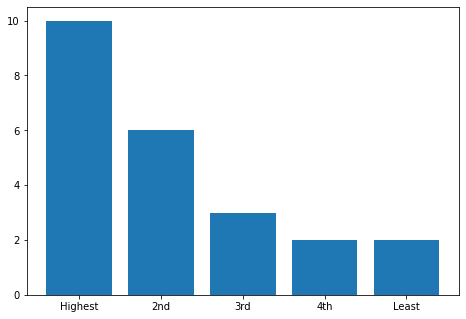

In [9]:
#Cell-9
#Distribution of Average 5 Highest-Paid Offensive Linemen on Across All Teams

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Highest', '2nd', '3rd', '4th', 'Least']
ax.bar(ranks,avg_salary_by_rank)
plt.show()
#y-axis in Millions of $ per year

#As displayed below, offense line salary distributions have one highly paid player
#and a large differential between that player and the 4th and 5th highest-paid offensive linemen on each team.
#The salary distributions across o-linemen suggest it is better for a defender to be 'super-blocked',
#by one highly-paid blocker, and paying a steep premium to do so.
#The downstream analysis suggests having a more balanced line block 'just well-enough'
#and (maximizing the PPP of weakest link) may be preferable.


In [10]:
#Cell-10
#in following captures combine data from 2000-2022 from as many O-linemen
#as possible
#this data comes from combines 2000-2022 from https://www.pro-football-reference.com
#due to special characters and/or transitions from excel to csv
#this data required some cleanup, this data is loaded from 2 different csv files
#and tab delimited text file  

combine_f = open("Supplemental_Public_Data/p1_OL_2000_2022_combine_results.csv","r")
combine_player = {}
combine_40 = {} #col5
combine_broad = {} #col8
combine_shuttle = {} #col10
combine_bench = {} #col7
combine_cone = {} #col9
combine_vertical = {} #col6

count = 0
for l in combine_f:
    parts = l.split(",")
    player = parts[0]
    #print(player)
    count = count + 1
    combine_player[player] = 1
    combine_40[player] = parts[4] #col5
    combine_vertical[player] = parts[5] #col6
    combine_broad[player] = parts[7] #col8
    combine_shuttle[player] = parts[9] #col10
    combine_bench[player] = parts[6] #col7
    combine_cone[player] = parts[8] #col9
    
combine_f.close()
#print(count)

combine_f = open("Supplemental_Public_Data/p2_OL_2000_2022_combine_results.txt","r")
count = 0
for l in combine_f:
    parts = l.split("\t")
    player = parts[0]
    #print(player)
    count = count + 1
    combine_player[player] = 1
    combine_40[player] = parts[3] #col4
    combine_vertical[player] = parts[5] #col6
    combine_broad[player]= parts[6] #col7
    combine_shuttle[player] = parts[8] #col9
    combine_bench[player] = parts[5] #col6
    combine_cone[player] = parts[7] #col8
    
combine_f.close()
#print(count)

combine_f = open("Supplemental_Public_Data/p3_OL_2000_2022_combine_results.csv","r")
count = 0
for l in combine_f:
    parts = l.split(",")
    player = parts[0]
    #print(player)
    count = count + 1
    combine_player[player] = 1
    combine_40[player] = parts[4] #col5
    combine_vertical[player] = parts[5] #col6
    combine_broad[player] = parts[7] #col8
    combine_shuttle[player] = parts[9] #col10
    combine_bench[player] = parts[6] #col7
    combine_cone[player] = parts[9] #col9
    
combine_f.close()

In [11]:
#Cell-11
#compute the average 40, bench, broad jump, vertical,
#shuttle run and cone run to be used in filling in gaps
#in the matrix when a player did not have one recorded at the combine

forty_count = 0
broad_count = 0
shuttle_count =  0
bench_count = 0
cone_count = 0 
vertical_count = 0
salary_count = 0

forty_total = 0
broad_total = 0
shuttle_total =  0
bench_total = 0
cone_total = 0
vertical_total = 0 
salary_total = 0

count = 0
for player in player_name.keys():
    name = player_name[player]
    if name in combine_player.keys():
        #print("yes")
        count = count + 1
        if(combine_40[name]):
            forty_total =  forty_total + float(combine_40[name])
            forty_count = forty_count + 1
            
        if(combine_vertical[name]):
            vertical_total =  vertical_total + float(combine_vertical[name])
            vertical_count = vertical_count + 1
            
        if(combine_broad[name]):
            broad_total =  broad_total + float(combine_broad[name])
            broad_count = broad_count + 1

        if(combine_shuttle[name]):
            try:
                shuttle_total =  shuttle_total + float(combine_shuttle[name])
                shuttle_count = shuttle_count + 1
            except:
                do_nothing = 1
                #print("oops")
            
        if(combine_bench[name]):
            bench_total =  bench_total + float(combine_bench[name])
            bench_count = bench_count + 1
            
        if(combine_cone[name]):
            cone_total =  cone_total + float(combine_cone[name])
            cone_count = cone_count + 1
        if(name in salary_name_to_dollars):
            salary_total =  salary_total + float(salary_name_to_dollars[name])
            salary_count = salary_count + 1

avg_forty = (forty_total/forty_count)
avg_broad = (broad_total/broad_count)
avg_shuttle =  (shuttle_total/shuttle_count)
avg_bench = (bench_total/bench_count)
avg_cone = (cone_total/bench_count)
avg_vertical = (vertical_total/vertical_count)
avg_salary = (salary_total/salary_count)

In [12]:
#Cell-12
#create matrix file that integrates 
#individual PPP score with a player's attributes, 
#combine data and salary

mf = open("Derived_Data/matrix.txt","w")
mf.write("Score\tHeight\tWeight\tAge\t40\tVertical\tBroad\tBench\tShuttle\tCone\tSalary\n")

for player in pp_plays_total.keys():
    bad_sum = (
     sacks_allowed[player] 
     + hits_allowed[player]
     + hurries_allowed[player]
     + beats_allowed[player] + 1)
    
    player_good_to_bad[player] = round((pp_plays_total[player]/ bad_sum),2)
    name = player_name[player]
    
    forty = 0
    vertical = 0
    bench = 0
    broad = 0
    shuttle = 0
    cone = 0
  
    if name in combine_player.keys():
        #print("yes")
        count = count + 1
        if(combine_40[name]):
            forty = combine_40[name]
        else:
            forty = avg_forty
            
        if(combine_vertical[name]):
            vertical = combine_vertical[name]
        else:
            vertical = avg_vertical
            
        if(combine_broad[name]):
            broad = combine_broad[name]
        else:
            broad = avg_broad
            
        if(combine_shuttle[name]):
            shuttle = combine_shuttle[name]
        else:
            shuttle = avg_shuttle
            
        if(combine_bench[name]):
            bench = combine_bench[name]
        else:
            bench = avg_bench
        
        if(combine_cone[name]):
            cone = combine_cone[name]
        else:
             cone = avg_cone
        if(name in salary_name_to_dollars):
            salary = salary_name_to_dollars[name]
        else:
             salary = avg_salary
    mf.write(
        str(player_good_to_bad[player])
        +"\t"+str(player_ht[player])
        +"\t"+str(player_wt[player]) 
        +"\t"+str(player_age[player])
        +"\t"+str(forty)
        +"\t"+str(vertical)
        +"\t"+str(broad)
        +"\t"+str(bench)
        +"\t"+str(shuttle)
        +"\t"+str(cone)
        +"\t"+str(salary)
        + "\n"
            )
mf.close()

In [13]:
#Cell-13
#let's do some basic exploration of the data
#using all attributes and continuous score
df= pd.read_csv('Derived_Data/matrix.txt', sep='\t')
df = df.dropna()
df.head(5)

,Score,Height,Weight,Age,40,Vertical,Broad,Bench,Shuttle,Cone,Salary
0,7.15,4.0,328.0,41.0,4.93,29.000000,115.00,21.000000,4.750000,4.750000,1.826731
1,10.00,7.0,330.0,42.0,5.16,30.500000,112.00,28.000000,4.830000,4.830000,4.765159
2,5.95,4.0,315.0,38.0,5.07,27.500000,105.00,24.000000,4.520000,4.520000,3.696000
3,11.00,4.0,330.0,36.0,5.28,28.321918,106.68,25.381579,4.704266,5.828487,4.765159
4,10.33,5.0,320.0,35.0,4.81,34.500000,113.00,23.000000,4.630000,4.630000,9.671765


In [14]:
#Cell-14
df.describe()

,Score,Height,Weight,Age,40,Vertical,Broad,Bench,Shuttle,Cone,Salary
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,7.086048,4.891129,314.282258,29.274194,3.430335,18.775133,70.309839,16.593591,3.110561,4.014691,4.641755
std,4.540377,1.495013,13.074412,3.124511,2.463477,13.624161,50.630568,12.465997,2.234498,3.073739,2.648372
min,0.000000,1.000000,260.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.795556
25%,4.530000,4.000000,307.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.255374
50%,6.485000,5.000000,314.000000,29.000000,5.100000,27.000000,104.000000,23.000000,4.620000,4.785000,4.765159
75%,8.605000,6.000000,320.250000,31.000000,5.220000,28.500000,106.760000,25.381579,4.704266,5.828487,4.765159
max,33.500000,9.000000,380.000000,42.000000,5.850000,34.500000,121.000000,44.000000,5.380000,8.410000,18.400000


In [15]:
#Cell-15
df.corr()
#Age/Experience has best correlation with PPP Score.
#Note as 40-yard dash, shuttle run and cone run are times, a negative correlation means a faster time
#is correlated with a better PPP score, though interestingly only very slightly.

,Score,Height,Weight,Age,40,Vertical,Broad,Bench,Shuttle,Cone,Salary
Score,1.000000,-0.215772,0.003994,0.258674,-0.066434,-0.050153,-0.062317,-0.013608,-0.064339,-0.044236,0.159282
Height,-0.215772,1.000000,0.278921,-0.054254,0.028437,0.034442,0.036970,-0.010567,0.034041,-0.079596,0.106092
Weight,0.003994,0.278921,1.000000,0.069454,-0.016277,-0.051532,-0.040249,-0.037748,-0.012142,-0.063473,0.019472
Age,0.258674,-0.054254,0.069454,1.000000,-0.116700,-0.102516,-0.110758,-0.116147,-0.118206,-0.151697,0.104588
40,-0.066434,0.028437,-0.016277,-0.116700,1.000000,0.982819,0.991687,0.949159,0.998377,0.936735,0.152268
Vertical,-0.050153,0.034442,-0.051532,-0.102516,0.982819,1.000000,0.993012,0.955165,0.983481,0.917943,0.173043
Broad,-0.062317,0.036970,-0.040249,-0.110758,0.991687,0.993012,1.000000,0.955986,0.991648,0.927609,0.165107
Bench,-0.013608,-0.010567,-0.037748,-0.116147,0.949159,0.955165,0.955986,1.000000,0.950302,0.917496,0.188511
Shuttle,-0.064339,0.034041,-0.012142,-0.118206,0.998377,0.983481,0.991648,0.950302,1.000000,0.935755,0.154181
Cone,-0.044236,-0.079596,-0.063473,-0.151697,0.936735,0.917943,0.927609,0.917496,0.935755,1.000000,0.131827


In [16]:
#loop through all teams top 5 highest paid players, and find weakest ppp
#make table of weakest ppp and team ppp

tf = open("Derived_Data/team_matrix.txt", "w")
tf.write("Team\tTeamPPP\tWeakest\tStrongest\tDelta\tAvgSalary\tSumOfSalaries\n")
team_weakest_ppp = {}
team_weakest_ppp = {}
team_strongest_ppp = {}

for id in player_name.keys():
    #print(id)
    if player_name[id] in salary_name_to_dollars:
        name = player_name[id]
        ppp = player_good_to_bad[id]
        if(ppp > 0):
            if name in salary_name_to_team:
                team = salary_name_to_team[name]
                #print(team)
                if (team in team_weakest_ppp):
                    if (ppp < team_weakest_ppp[team]):
                        team_weakest_ppp[team] = ppp
                else:
                    team_weakest_ppp[team] = ppp

                if (team in team_strongest_ppp):
                    if (ppp > team_strongest_ppp[team]):
                        team_strongest_ppp[team] = ppp
                else:
                    team_strongest_ppp[team] = ppp
for team in team_weakest_ppp:
    team_ppp = team_good_to_bad[team]
    weakest_ppp = team_weakest_ppp[team]
    strongest_ppp = team_strongest_ppp[team]
    delta = strongest_ppp - weakest_ppp
    tf.write((team + 
              "\t" + str(team_ppp) + 
              "\t" + str(weakest_ppp) + 
              "\t" + str(strongest_ppp) + 
              "\t" + str(round(delta,2)) + 
              "\t" + str(team_avg[team]) +
              "\t" + str(team_sum[team]) + 
              "\n"))
tf.close()

In [17]:
#Cell-17
df= pd.read_csv('Derived_Data/team_matrix.txt', sep='\t')
df = df.dropna()
df.head(5)

,Team,TeamPPP,Weakest,Strongest,Delta,AvgSalary,SumOfSalaries
0,DAL,8.62,7.15,9.82,2.67,4014248.8,20071244
1,NYJ,7.73,4.62,10.69,6.07,4968466.8,24842334
2,SF,6.93,4.05,10.33,6.28,5099631.8,25498159
3,CHI,5.37,3.64,8.20,4.56,3885752.2,19428761
4,ARI,7.24,4.00,33.50,29.50,6093832.4,30469162


In [18]:
#Cell-18
df.corr()
#This correlation clearly shows its good to have strong best o-lineman, 
#but it is more important to 
#to Team PPP to have a balanced line where you 
#maximize the PPP of your weakest o-lineman.

,TeamPPP,Weakest,Strongest,Delta,AvgSalary,SumOfSalaries
TeamPPP,1.000000,0.352786,0.337682,0.214244,0.250167,0.250167
Weakest,0.352786,1.000000,0.060021,-0.260469,0.281798,0.281798
Strongest,0.337682,0.060021,1.000000,0.948108,0.404998,0.404998
Delta,0.214244,-0.260469,0.948108,1.000000,0.301965,0.301965
AvgSalary,0.250167,0.281798,0.404998,0.301965,1.000000,1.000000
SumOfSalaries,0.250167,0.281798,0.404998,0.301965,1.000000,1.000000
